<a href="https://colab.research.google.com/github/micaelakorol21/water_quality/blob/main/water_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
from kagglehub import KaggleDatasetAdapter

In [ ]:
# Esto es una prueba

In [ ]:
# Objetivo: Predecir si el agua es potable o no.

In [ ]:
df = pd.read_csv('./Water_Quality_Prediction2.csv')

In [ ]:
df.shape

(1048575, 24)

In [ ]:
df.dtypes

Index                       int64
pH                        float64
Iron                      float64
Nitrate                   float64
Chloride                  float64
Lead                      float64
Zinc                      float64
Color                      object
Turbidity                 float64
Fluoride                  float64
Copper                    float64
Odor                      float64
Sulfate                   float64
Conductivity              float64
Chlorine                  float64
Manganese                 float64
Total Dissolved Solids    float64
Source                     object
Water Temperature         float64
Air Temperature           float64
Month                      object
Day                       float64
Time of Day               float64
Target                      int64
dtype: object

In [ ]:
# Columnas que tienen datos faltantes
df.isna().sum()

Index                         0
pH                        20231
Iron                       6991
Nitrate                   18695
Chloride                  30834
Lead                       4684
Zinc                      27675
Color                       981
Turbidity                  8694
Fluoride                  33218
Copper                    34882
Odor                      31332
Sulfate                   34525
Conductivity              28803
Chlorine                  10162
Manganese                 19339
Total Dissolved Solids      298
Source                    15535
Water Temperature         29688
Air Temperature            5303
Month                     16921
Day                       17549
Time of Day               20361
Target                        0
dtype: int64

In [ ]:
df.columns

Index(['Index', 'pH', 'Iron', 'Nitrate', 'Chloride', 'Lead', 'Zinc', 'Color',
       'Turbidity', 'Fluoride', 'Copper', 'Odor', 'Sulfate', 'Conductivity',
       'Chlorine', 'Manganese', 'Total Dissolved Solids', 'Source',
       'Water Temperature', 'Air Temperature', 'Month', 'Day', 'Time of Day',
       'Target'],
      dtype='object')

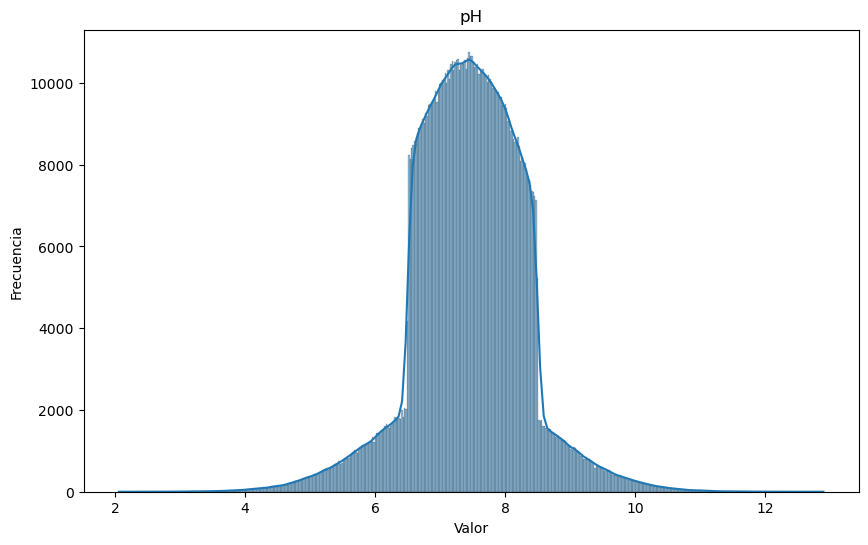

In [ ]:
# Observamos la distribuición de la columna pH:
plt.figure(figsize=(10, 6))
sns.histplot(df['pH'], kde=True)
plt.title('pH')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
df['pH'].describe()

count    1.028344e+06
mean     7.449869e+00
std      8.478455e-01
min      2.058008e+00
25%      6.914812e+00
50%      7.452940e+00
75%      8.001406e+00
max      1.289196e+01
Name: pH, dtype: float64

In [ ]:
#¿Eliminar los datos que indican que el pH del agua no es potable?
#No eliminar datos fuera del estándar de potabilidad, como un pH fuera de 5.5–9.5, si esos valores son físicamente posibles y ocurren en la realidad.
#Esos datos no son "erróneos", son ejemplos negativos importantes para que el modelo aprenda a distinguir entre agua potable y no potable.
#Solo eliminar valores físicamente imposibles o errores claros, como pH negativos, nulos mal imputados, o valores duplicados sin sentido.

In [ ]:
# Filtrar pH negativos ph_negativos = df[df['pH'] > 0] - No hay
# Mal imputados (ej: pH = 0 exactamente. - No hay
#ph_igual_cero = df[df['pH'] == 0]
#print(ph_igual_cero)

In [ ]:
ph_nulos = df['pH'].isnull().sum()
print(f"Cantidad de valores nulos en pH: {ph_nulos}")
# Eliminar nulos d la columna pH
df_sinpHnulos = df.dropna(subset=['pH'])

Cantidad de valores nulos en pH: 20231


In [ ]:
df_sinpHnulos = df_sinpHnulos['pH'].isnull().sum()
df_sinpHnulos
# Hacer mascara: eliminar pH <5 y >10

0

In [ ]:
#Evaluar la importancia de cada variable para el objetivo (‘potable’ o no), y decidir si su ausencia afecta el aprendizaje del modelo

In [ ]:
#df_sinpHnulos = df_sinpHnulos.drop(['Month', 'Day', 'Time of Day'], axis=1)
#Ver la distribuicion de las columnas Month , Day y Time of Day

In [ ]:
# Columnas que tienen datos faltantes
df_sinpHnulos.isna().sum()

Index                         0
pH                            0
Iron                       6862
Nitrate                   18360
Chloride                  30271
Lead                       4612
Zinc                      27110
Color                       959
Turbidity                  8544
Fluoride                  32544
Copper                    34203
Odor                      30746
Sulfate                   33864
Conductivity              28256
Chlorine                   9959
Manganese                 18924
Total Dissolved Solids      292
Source                    15250
Water Temperature         29101
Air Temperature            5219
Target                        0
dtype: int64

In [ ]:
# Ver distribuicion de las columnas más relevantes:
columnas = ['pH', 'Total Dissolved Solids', 'Conductivity']

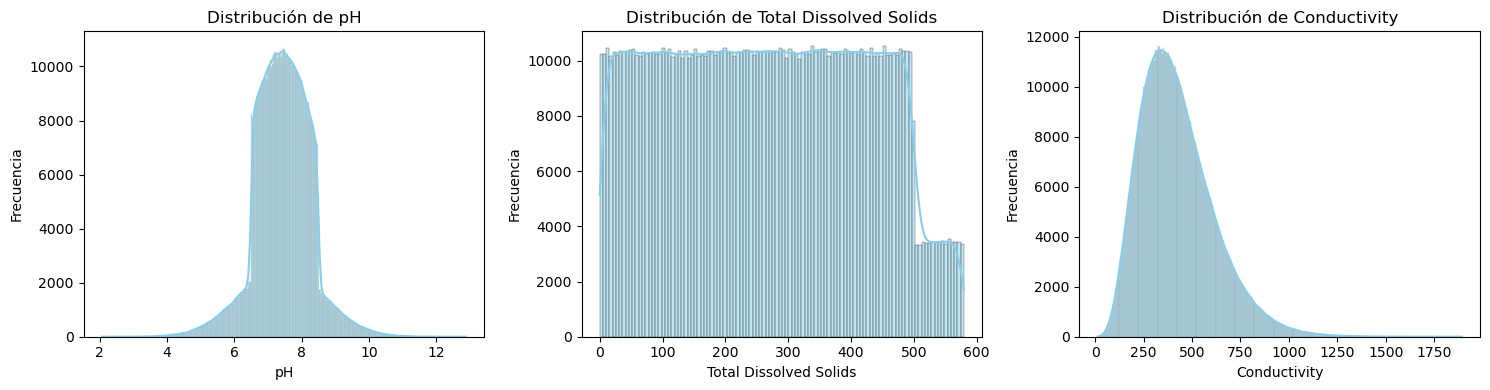

In [ ]:
fig, axes = plt.subplots(1, len(columnas), figsize=(5 * len(columnas), 4))

for i, col in enumerate(columnas):
    sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()
